# An exploration of internal ribosome entry sites (IRES) in single-stranded RNA (ssRNA) viruses

### Sarah Johnson and Nicholas Forino - BIOL 419

Our investigations will focus on understanding how IRESs are distributed across virus families, identifying which virus genomes are the most IRES-rich, contain the most "potent" IRESs.

In [2]:
# preliminaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline

In [62]:
# loading the data

# this is the table that contains IRES activity for the ssRNA coding sequences (CDS) by oligo index
data = pd.read_excel('aad4939_Table_S8.xlsx', index_col = 1, skip_footer = 1, skiprows = np.arange(1, 378), header = 0)

print('Our data has shape:', data.shape)

Our data has shape: (6388, 8)


In [63]:
# here's the first 5 rows of the data table
data

,Oligo_Index,Virus_name,Virus_class,ORF_start,ORF_end,Oligo_start_position,eGFP_expression (a.u),Oligo_sequence
Accession,,,,,,,,
NC_001430,29583,Enterovirus_D,"ssRNApositive_strandviruses,noDNAstage;Picorna...",727,7311,1,206.29,CTAGGGCGCGCCAGTCCTGGTGTTTCGCTCTGGGGTTGTTCCCACC...
NC_001430,13793,Enterovirus_D,"ssRNApositive_strandviruses,noDNAstage;Picorna...",727,7311,175,1838.30,CTAGGGCGCGCCAGTCCTTCTGTTTCCCCGGTGAAGTTGCATAGAC...
NC_001430,13794,Enterovirus_D,"ssRNApositive_strandviruses,noDNAstage;Picorna...",727,7311,349,206.29,CTAGGGCGCGCCAGTCCTGACGTGGTCCAGGCTGCGTTGGCGGCCT...
NC_001430,29737,Enterovirus_D,"ssRNApositive_strandviruses,noDNAstage;Picorna...",727,7311,523,206.29,CTAGGGCGCGCCAGTCCTCGCAGAATGTGGCGGAACCGACTACTTT...
NC_001430,13795,Enterovirus_D,"ssRNApositive_strandviruses,noDNAstage;Picorna...",727,7311,697,206.29,CTAGGGCGCGCCAGTCCTCTTTCTCTTGAATAATTGAGACAACTCA...
NC_001430,13796,Enterovirus_D,"ssRNApositive_strandviruses,noDNAstage;Picorna...",727,7311,871,206.29,CTAGGGCGCGCCAGTCCTGACCCATCCAAGTTCACAGAGCCTGTAG...
NC_001430,13797,Enterovirus_D,"ssRNApositive_strandviruses,noDNAstage;Picorna...",727,7311,1045,206.29,CTAGGGCGCGCCAGTCCTTGGCCCACCTATCTACCTGATAATGAGG...
NC_001430,13798,Enterovirus_D,"ssRNApositive_strandviruses,noDNAstage;Picorna...",727,7311,1219,206.29,CTAGGGCGCGCCAGTCCTGTCCAATACCACTACCTGTATAGGAGTG...
NC_001430,13799,Enterovirus_D,"ssRNApositive_strandviruses,noDNAstage;Picorna...",727,7311,1393,206.29,CTAGGGCGCGCCAGTCCTGTATTTGAACAACCCTACCTTTTAGATG...


In [65]:
data.loc['NC_001430', 'Virus_name']

Accession 
NC_001430    Enterovirus_D
NC_001430    Enterovirus_D
NC_001430    Enterovirus_D
NC_001430    Enterovirus_D
NC_001430    Enterovirus_D
NC_001430    Enterovirus_D
NC_001430    Enterovirus_D
NC_001430    Enterovirus_D
NC_001430    Enterovirus_D
NC_001430    Enterovirus_D
NC_001430    Enterovirus_D
NC_001430    Enterovirus_D
NC_001430    Enterovirus_D
NC_001430    Enterovirus_D
NC_001430    Enterovirus_D
NC_001430    Enterovirus_D
NC_001430    Enterovirus_D
NC_001430    Enterovirus_D
NC_001430    Enterovirus_D
NC_001430    Enterovirus_D
NC_001430    Enterovirus_D
NC_001430    Enterovirus_D
NC_001430    Enterovirus_D
NC_001430    Enterovirus_D
NC_001430    Enterovirus_D
NC_001430    Enterovirus_D
NC_001430    Enterovirus_D
NC_001430    Enterovirus_D
NC_001430    Enterovirus_D
NC_001430    Enterovirus_D
NC_001430    Enterovirus_D
NC_001430    Enterovirus_D
NC_001430    Enterovirus_D
NC_001430    Enterovirus_D
NC_001430    Enterovirus_D
NC_001430    Enterovirus_D
NC_001430    Ente

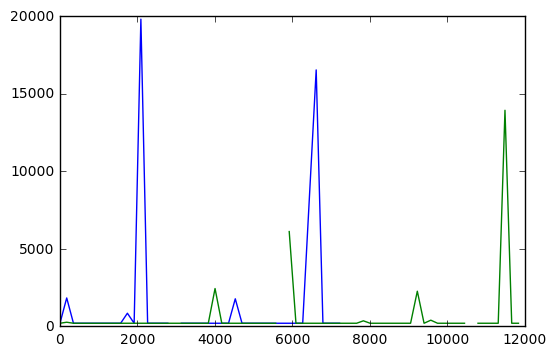

In [85]:
entero = data.loc['NC_001430', :]
entero['eGFP_expression (a.u)'].fillna(0)

swine = data.loc['Z46258', :]
swine['eGFP_expression (a.u)'].fillna(0)

plt.plot(entero.loc[:, 'Oligo_start_position'], entero.loc[:, 'eGFP_expression (a.u)'])


plt.plot(swine.loc[:, 'Oligo_start_position'], swine.loc[:, 'eGFP_expression (a.u)'])

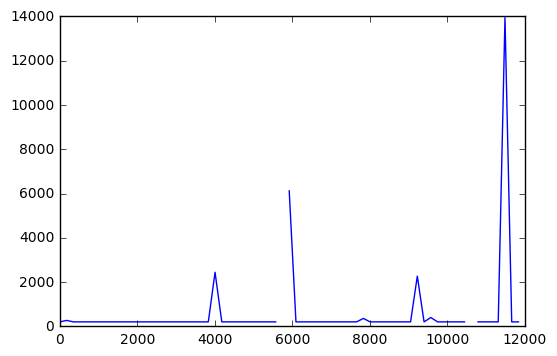

In [84]:
swine = data.loc['Z46258', :]
swine['eGFP_expression (a.u)'].fillna(0)
swine
plt.plot(swine.loc[:, 'Oligo_start_position'], swine.loc[:, 'eGFP_expression (a.u)'])

In [ ]:
viruses